In [38]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
PATH_DATA = Path("./dataset")
PATH_FIGURES = Path("./figures/GMM")
PATH_FIGURES.mkdir(parents=True, exist_ok=True)

def savefig(fname): plt.savefig(PATH_FIGURES.joinpath(fname), dpi=300)

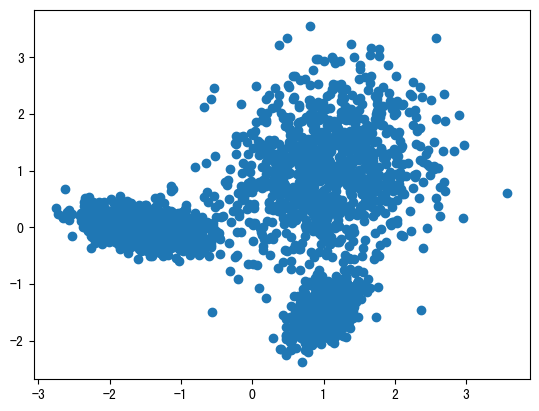

In [182]:
np.random.seed(42)
means = [(1,1),(-1.5,0),(1,-1.5)]
sigma2 = [0.3, 0.2, 0.1]
X = None
for i in range(len(means)):
    base = np.eye(2) + np.random.normal(size=(2,2))
    x = np.random.multivariate_normal(means[i], base * sigma2[i], 1000)
    X = x if X is None else np.r_[X, x]
plt.scatter(X[:,0], X[:,1])
plt.show()

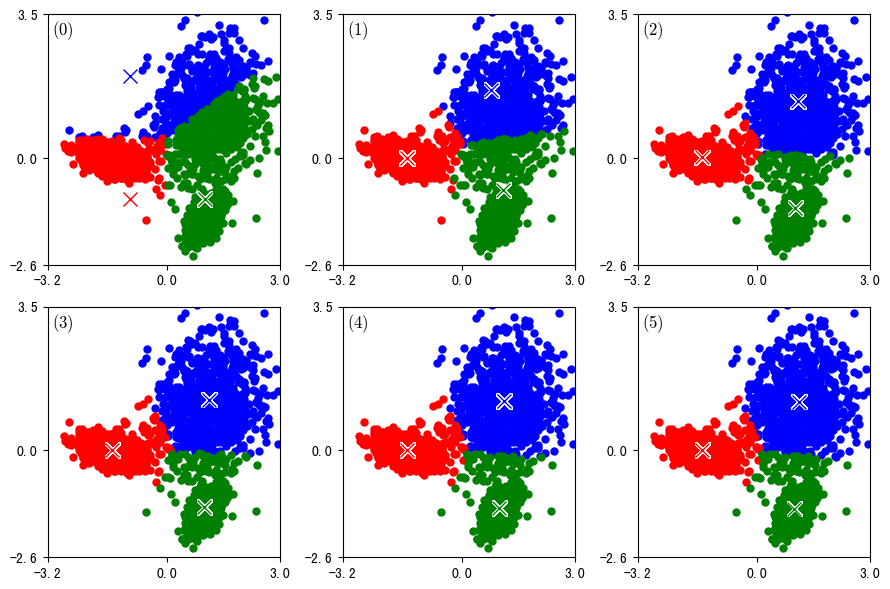

In [203]:
x = X
fig, axs = plt.subplots(2,3,figsize=(9,6))
def plot_union(union, mu, ax:plt.Axes, color=''):
    ax.plot(union[:,0], union[:,1], '.'+color, markersize=10)
    x, y = np.meshgrid(np.linspace(-0.02,0.02,10), np.linspace(-0.02,0.02,10))
    ax.plot(mu[0]+x, mu[1]+y, 'xw', markersize=10)
    ax.plot(mu[0], mu[1], 'x'+color, markersize=10)
    ax.set_xticks([-3.2, 0, 3])
    ax.set_yticks([-2.6, 0, 3.5])
    ax.axis([-3.2, 3, -2.6, 3.5])
def plt_midline(cnt, mu, ax):
    ax.text(-2.8, 3, f"$({cnt})$", fontsize=12, ha='center', color='k', math_fontfamily='cm')
    # a = (mu[0] + mu[1]) / 2
    # b = mu[0] - mu[1]; b[0],b[1] = b[1],-b[0]
    # x = np.array([a + (-2-a[0])/b[0] * b, a + (2-a[0])/b[0] * b])
    # ax.plot(x[:,0], x[:,1], '-g')
def getdis(x, mu):
    dis = []
    for i in range(mu.shape[0]):
        dis.append(np.sqrt(np.sum(np.power(x-mu[i], 2))))
    return dis
# mu = np.array([[-1, 1], [1, -1], [0, 0]])
mu = np.array([[-1, 2], [-1, -1], [1, -1]])
for cnt, ax in enumerate(axs.reshape(-1)):
    dis = np.array([getdis(x[i], mu) for i in range(x.shape[0])])
    # E步
    r = np.argmin(dis, axis=1)
    plot_union(x[r==0], mu[0], ax, 'b')
    plot_union(x[r==1], mu[1], ax, 'r')
    plot_union(x[r==2], mu[2], ax, 'g')
    plt_midline(cnt, mu, ax)
    # M步
    mu = np.array([np.mean(x[r==i], axis=0) for i in range(mu.shape[0])])
fig.tight_layout()
savefig("Kmeans"); plt.show()

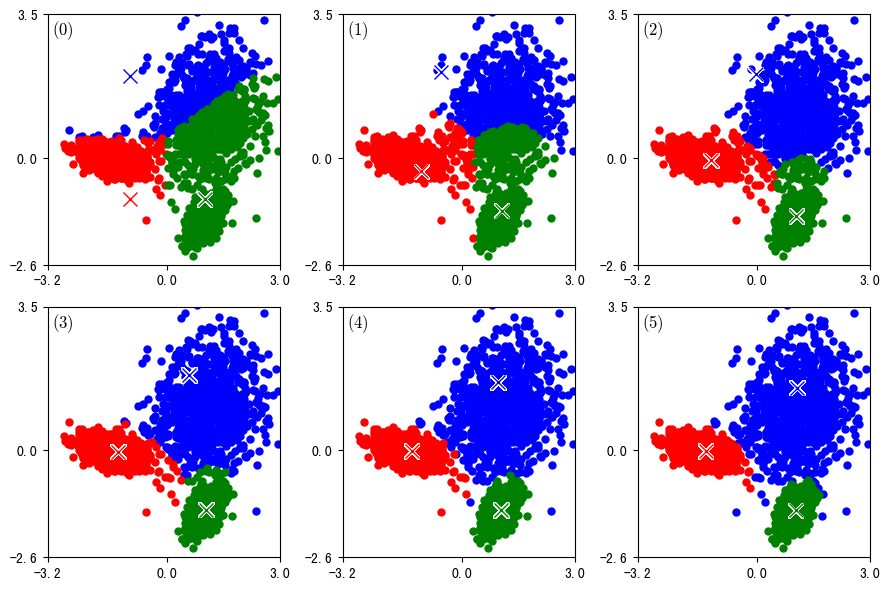

In [204]:
N = X.shape[0]
K = 3
mu = np.array([[-1, 2], [-1, -1], [1, -1]])
sigma = np.array([0.1*np.eye(2) for _ in range(K)])
pi = np.full(3, 1/K)
def calc_normal(x, mu, sigma):
    return np.power(2*np.pi, -K/2) * np.linalg.det(sigma) * np.exp(-0.5*np.dot(np.dot(x-mu, np.linalg.inv(sigma)), (x-mu).T))
# print(calc_normal(np.array([1, 2]), np.array([1, 1]), np.eye(2)))

fig, axs = plt.subplots(2,3,figsize=(9,6)); axs = axs.reshape(-1)
acnt = 0
def plot_figure(R):
    axs[acnt].text(-2.8, 3, f"$({acnt})$", fontsize=12, ha='center', color='k', math_fontfamily='cm')
    pred = np.argmax(R, axis=1)
    for k, color in enumerate(['b', 'r', 'g']):
        plot_union(X[pred==k], mu[k], axs[acnt], color)
for T in range(6):
    # E步
    R = np.array([[calc_normal(X[i], mu[j], sigma[j]) for j in range(3)] for i in range(len(X))])
    plot_figure(R); acnt += 1
    # M步
    w = np.concatenate([R[:,j].reshape(-1, 1)/np.sum(R[:,j]) for j in range(K)], axis=1)
    pi = np.concatenate([R[:,j].reshape(-1, 1)/N for j in range(K)], axis=1)
    sigma = np.array([np.sum([w[i,k] * np.dot((X[i]-mu[k]).reshape(-1,1), (X[i]-mu[k]).reshape(1,-1)) for i in range(N)], axis=0) for k in range(K)])
    mu = np.array([[np.dot(X[:,i], w[:,k]) for i in range(2)] for k in range(K)])
    # break
# pred = np.argmax(R, axis=1)
fig.tight_layout()
savefig("GMM"); plt.show()